## Measures of Success for Binary Classification

All the measures of success measure how good or bad the classification is for one train/test split; it depends on the training data.

1. Accuracy = proportion of correct classifications
2. Confusion Matrix 
3. True Positive Rate
4. False Positive Rate
5. Precision
6. AUC (Area Under the Curve)

The Confusion matrix lists by category the correctly categorized and incorrectly categorized items.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
DF = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"+"processed.cleveland.data", 
                 header=None,
                na_values="?")

In [3]:
DF = DF.dropna(axis=0)


In [5]:
names =["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num" ]

In [7]:
DF.columns = names

In [8]:
X = DF.thalach.to_numpy()

In [9]:
Y = np.array([1 if x > 0 else 0 for x in DF.num])

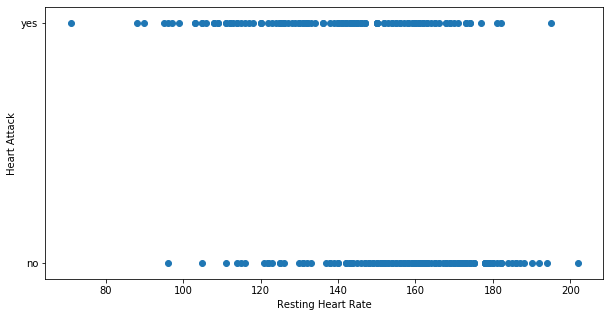

In [10]:
plt.scatter(X,Y)
plt.xlabel("Resting Heart Rate")
plt.ylabel("Heart Attack")
plt.yticks([0,1],["no","yes"]);
plt.gcf().set_size_inches(10,5)

In [12]:
X = X.reshape(-1,1)

In [13]:
model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
model.fit(xtrain, ytrain)
yp = model.predict(xtest)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(ytest,yp)

array([[33, 10],
       [11, 21]])

## True Positive Rate aka Recall aka Sensitivity

True Positive Rate = Proportion of Positives

TPR = TP/P = TP/(TP+FN)

In [16]:
from sklearn.metrics import recall_score
recall_score(ytest,yp)

0.65625

Interpretation: 65% of the positive results were correctly classified

# False Positive Rate = Fallout

# Specificity = 1 - Fallout

FPR = proportion of Negatives classified as Positives

FPR = FP /(TN + FP)

In [22]:
[[TN,FP],[FN,TP]] = confusion_matrix(ytest,yp)
FP/(TN+FP)  # We want a low FPR

0.23255813953488372

# Precision = Proportion of Predicted "1" values in the ypredicted that are actually "1" values in ytest

YP = TP/(TP+FP)

In [23]:
from sklearn.metrics import precision_score
precision_score(ytest,yp)

0.6774193548387096

# Accuracy Score = Actual proportion of correct predictions

Accuracy = (TP = TN)/ (TP + TN + FP + FN)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,yp)

0.72

In [30]:
model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
model.fit(xtrain, ytrain)
yp = model.predict(xtest)

print(f"CM = {confusion_matrix(ytest,yp)}")

print(f"Accuracy {accuracy_score(ytest,yp)}")
print(f"Precision {precision_score(ytest,yp)}")
print(f"Recall {recall_score(ytest,yp)}")


CM = [[33  7]
 [11 24]]
Accuracy 0.76
Precision 0.7741935483870968
Recall 0.6857142857142857


# ROC Curve

# Plot TP Ratio as function of FP Ratio

In [31]:
model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
model.fit(xtrain, ytrain)
yp = model.predict(xtest)

In [37]:
probabilities = model.predict_proba(xtest)[:,1] # We want just the second column, true probabilities 

In [38]:
probabilities

array([0.17091876, 0.67575116, 0.58821922, 0.61088525, 0.30497464,
       0.69608842, 0.45940558, 0.47115139, 0.19193427, 0.22293602,
       0.40160032, 0.16433196, 0.7611931 , 0.33579716, 0.19193427,
       0.82301899, 0.17771343, 0.74360782, 0.41299729, 0.59960552,
       0.33579716, 0.23972065, 0.23122186, 0.34640774, 0.45940558,
       0.50652879, 0.33579716, 0.4477047 , 0.30497464, 0.91581312,
       0.91938249, 0.47115139, 0.55353629, 0.37913348, 0.14001138,
       0.34640774, 0.56517268, 0.29506024, 0.2758065 , 0.45940558,
       0.68600907, 0.54184094, 0.41299729, 0.28533582, 0.67575116,
       0.56517268, 0.49472608, 0.3253498 , 0.42448826, 0.29506024,
       0.18471803, 0.57673769, 0.47115139, 0.30497464, 0.36808502,
       0.56517268, 0.4477047 , 0.18471803, 0.31507329, 0.35717331,
       0.654728  , 0.80143661, 0.69608842, 0.56517268, 0.35717331,
       0.51832424, 0.14579342, 0.68600907, 0.35717331, 0.54184094,
       0.40160032, 0.53009929, 0.74360782, 0.33579716, 0.14001

In [39]:
from sklearn.metrics import roc_curve

In [62]:
FPR, TPR, THRESHOLD = roc_curve(ytest, probabilities)

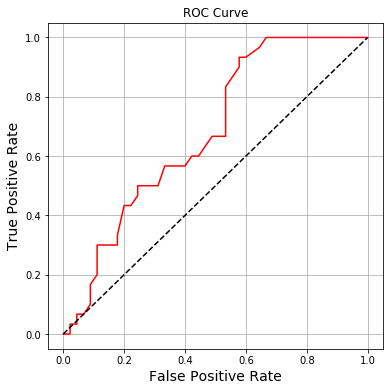

In [56]:
plt.plot(FPR,TPR,c="red")
plt.plot([0,1],[0,1], c='k', ls='--')
plt.grid()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.gcf().set_size_inches(6,6)

In [57]:
from scipy import interpolate

In [63]:
x=THRESHOLD
y=np.vstack([FPR,TPR])

In [64]:
g = interpolate.interp1d(x,y)

In [65]:
annotation_intervals=np.arange(.2,1,.1)
annotation_intervals

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [66]:
xyvals = g(annotation_intervals)

In [67]:
xyvals

array([[0.83112326, 0.65559464, 0.49101107, 0.30117153, 0.16596903,
        0.08888889, 0.04523773, 0.02600913],
       [1.        , 0.98339196, 0.66666667, 0.5       , 0.3       ,
        0.16117897, 0.06666667, 0.03333333]])

In [68]:
xvals, yvals = xyvals

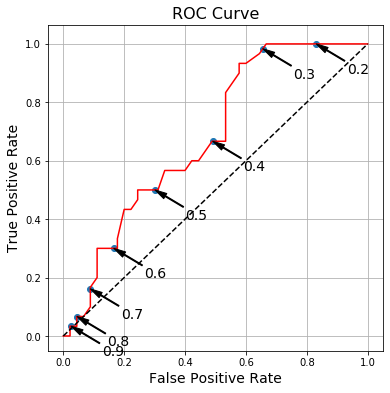

In [77]:
plt.plot(FPR,TPR,c="red")
plt.plot([0,1],[0,1], c='k', ls='--')
plt.grid()
plt.scatter(xvals,yvals)
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

for t,x,y in zip(annotation_intervals, xvals, yvals):
    plt.annotate(str(round(t,1)),(x,y),
                 xytext=(x+.1,y-.1),
                 fontsize=14,
                 arrowprops={
                     "width":1.0,
                     "facecolor":"black",
                     "headwidth":6
                    }
                )

plt.gcf().set_size_inches(6,6)

In [85]:
DF[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [86]:
X[:5]

array([[150.],
       [108.],
       [129.],
       [187.],
       [172.]])

In [87]:
Y[:5]

array([0, 1, 1, 0, 0])

In [88]:
# First look at all the numerical features

In [90]:
X=DF[["age","trestbps","chol","thalach"]].to_numpy()
X[:10]

array([[ 63., 145., 233., 150.],
       [ 67., 160., 286., 108.],
       [ 67., 120., 229., 129.],
       [ 37., 130., 250., 187.],
       [ 41., 130., 204., 172.],
       [ 56., 120., 236., 178.],
       [ 62., 140., 268., 160.],
       [ 57., 120., 354., 163.],
       [ 63., 130., 254., 147.],
       [ 53., 140., 203., 155.]])

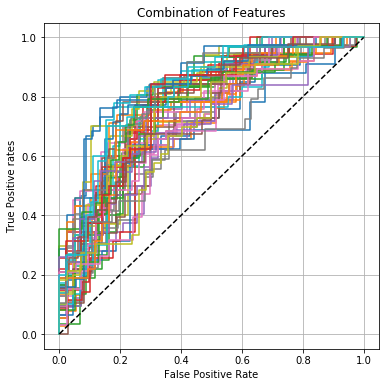

In [95]:
fig,ax = plt.subplots(1,1)
for j in range(50):
    mymodel = LogisticRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    mymodel.fit(xtrain,ytrain)
    probabilities = mymodel.predict_proba(xtest)[:,1]
    FPR,TPR, THRESHOLDS=roc_curve(ytest,probabilities)
    ax.plot(FPR,TPR)
    
    
ax.grid()
ax.plot([0,1],[0,1], c="k",ls="--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive rates")
ax.set_title("Combination of Features")
fig.set_size_inches(6,6)
    

In [97]:
np.unique(DF['cp'].to_numpy())

array([1., 2., 3., 4.])

# Problems with Blindly Assigning Numerical Values to a Categorical Data

# Example: Miles Per Gallon fuel economy

# Variable Origin

# 1,2,3 = Japan, US, Europe

In [101]:
pd.get_dummies(DF["cp"])[:5]

,1.0,2.0,3.0,4.0
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [116]:
XDATA=pd.get_dummies(DF, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']).drop(columns="num")

In [117]:
XDATA

,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [118]:
X = XDATA.to_numpy()

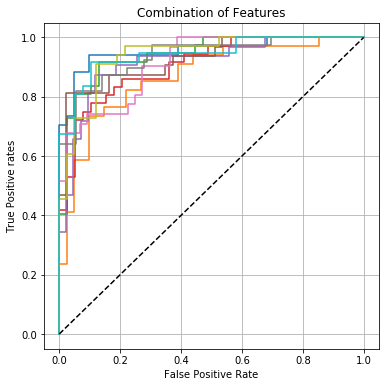

In [121]:
fig,ax = plt.subplots(1,1)
ACCS = []
for j in range(10):
    mymodel = LogisticRegression(max_iter=1000,solver="newton-cg")
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    mymodel.fit(xtrain,ytrain)
    yp = mymodel.predict(xtest)
    probabilities = mymodel.predict_proba(xtest)[:,1]
    FPR,TPR, THRESHOLDS=roc_curve(ytest,probabilities)
    ax.plot(FPR,TPR)
    ACCS.append(accuracy_score(ytest,yp))
    
    
ax.grid()
ax.plot([0,1],[0,1], c="k",ls="--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive rates")
ax.set_title("Combination of Features")
fig.set_size_inches(6,6)

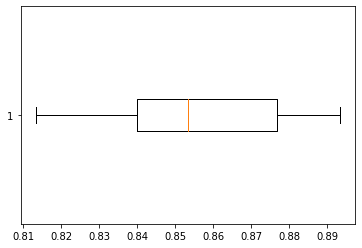

In [126]:
plt.boxplot(ACCS,vert=False);